In [291]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

import re,json,nltk

from sklearn.preprocessing import LabelEncoder

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score

from tensorflow.keras.preprocessing.text import Tokenizer



class color: # Text style

   PURPLE = '\033[95m'

   CYAN = '\033[96m'

   DARKCYAN = '\033[36m'

   BLUE = '\033[94m'

   GREEN = '\033[92m'

   YELLOW = '\033[93m'

   RED = '\033[91m'

   BOLD = '\033[1m'

   UNDERLINE = '\033[4m'

   END = '\033[0m'


In [292]:
import re

from nltk.tokenize import word_tokenize

import nltk

from nltk.tokenize import word_tokenize

import re

import string

from nltk.tokenize import word_tokenize

from nltk.corpus import stopwords



import nltk

nltk.download('all')









# Download the 'punkt' tokenizer

nltk.download('punkt')

from nltk.tokenize import word_tokenize

from nltk.corpus import stopwords

nltk.download('stopwords')

nltk.download('punkt')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /usr/share/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /usr/share/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package ave

True

In [293]:
Train = pd.read_excel('/kaggle/input/augmented-dataset/train.xlsx')
Test = pd.read_excel('/kaggle/input/augmented-dataset/test.xlsx')
Validation = pd.read_excel('/kaggle/input/augmented-dataset/dev.xlsx')



In [294]:
Validation

,Review,label
0,পাডা পুতার মাঝখানে পরে সাধারণ ২ মানুষের জিবন শ...,0
1,করোনার চাপে অনেক কিছু বন্ধ ও অনেক বিধি নিষেধ ক...,0
2,সঠিক তদন্ত করতে হবে বিচারের আওতায় আনতে হবে যে...,0
3,যে লোকটা মারা গেছে তার কি হবে তার দায়ভার কে ন...,0
4,নিউ মার্কেট এবং গুলিস্থান মার্কেটের ব্যবসায়ীর...,1
...,...,...
1325,নাটক টা সুন্দর ভাবে সাজিয়েছে আরো কত কিছু দেখত...,1
1326,নোংরা দেশ আর নোংরা জাতি হচ্ছে ভারত এঁরা কি বুঝ...,1
1327,জে ছেলে মারা গেছে ওর কি হবে,0
1328,এরাই নৈরাজ্য সৃষ্টি করছে,1


In [295]:
Train.rename(columns={'Review': 'text'}, inplace=True)
Test.rename(columns={'Review': 'text'}, inplace=True)
Validation.rename(columns={'Review': 'text'}, inplace=True)


In [296]:

# Extract the texts and labels
Train_texts = Train['text'].values
Test_texts = Test['text'].values
Validation_texts = Validation['text'].values


Train_labels = Train['label'].values
Test_labels = Test['label'].values
Validation_labels = Validation['label'].values

In [297]:
reviews_lines1=list()
Train_reviews_lines = list()
lines= Train['text'].values.tolist()

for line in lines:

  tokens=word_tokenize(line)

  reviews_lines1.append(tokens)
  Train_reviews_lines.append(tokens)

In [298]:
Test_reviews_lines = list()
lines= Test['text'].values.tolist()

for line in lines:
  tokens=word_tokenize(line)

  reviews_lines1.append(tokens)
  Test_reviews_lines.append(tokens)

In [299]:
Val_reviews_lines = list()
lines= Validation['text'].values.tolist()

for line in lines:
  tokens=word_tokenize(line)

  reviews_lines1.append(tokens)
  Val_reviews_lines.append(tokens)

In [300]:
len(reviews_lines1)

8746

In [301]:
len(Test_reviews_lines)

2016

In [302]:
# !pip install glove-python3

In [303]:
from sklearn.preprocessing import LabelEncoder

from keras.utils import to_categorical



# Initialize the label encoder

label_encoder = LabelEncoder()



# Convert string labels (e.g., 'A', 'B', etc.) to integers

train_labels = label_encoder.fit_transform(Train_labels)
test_labels = label_encoder.fit_transform(Test_labels)
val_labels = label_encoder.fit_transform(Validation_labels)



# Now convert the integer labels to one-hot encoding

y_train = to_categorical(train_labels, num_classes=3)  # Assuming 5 classes
y_test = to_categorical(test_labels, num_classes=3)  # Assuming 5 classes
y_val = to_categorical(val_labels, num_classes=3)  # Assuming 5 classes


# Check if the labels have been correctly transformed

print(f"Encoded labels: {train_labels}")

print(f"One-hot encoded labels shape: {train_labels.shape}")

Encoded labels: [0 0 0 ... 0 0 2]
One-hot encoded labels shape: (5400,)


In [304]:
from tensorflow.keras.preprocessing.text import Tokenizer

from tensorflow.keras.preprocessing.sequence import pad_sequences

import numpy as np



# Initialize the Tokenizer

tokenizer_obj = Tokenizer()

tokenizer_obj.fit_on_texts(reviews_lines1)



# Convert texts to sequences of integers

train_sequences = tokenizer_obj.texts_to_sequences(Train_reviews_lines)
test_sequences = tokenizer_obj.texts_to_sequences(Test_reviews_lines)
val_sequences = tokenizer_obj.texts_to_sequences(Val_reviews_lines)



# Define maximum length for padding

max_length = 100



word_index=tokenizer_obj.word_index



# Pad sequences to ensure uniform input size

X_train_pad = pad_sequences(train_sequences, maxlen=max_length, padding='post')
X_test_pad = pad_sequences(test_sequences, maxlen=max_length, padding='post')
X_val_pad = pad_sequences(val_sequences, maxlen=max_length, padding='post')






print("Training content shape:", X_train_pad.shape)

print("Training language shape:", y_train.shape)


Training content shape: (5400, 100)
Training language shape: (5400, 3)


In [305]:
print(X_train_pad.shape)
print(y_train.shape)
print(X_val_pad.shape)
print(y_val.shape)
print(X_test_pad.shape)
print(y_test.shape)

(5400, 100)
(5400, 3)
(1330, 100)
(1330, 3)
(2016, 100)
(2016, 3)


In [306]:
y_test

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [307]:
from gensim.models import FastText

# Define embedding dimension
EMBEDDING_DIM = 200

# Train FastText model (same configuration as Word2Vec)
model = FastText(
    sentences=reviews_lines1,
    vector_size=200,
    window=3,
    min_count=2,
    workers=4,
    sg=1  # 1 = skip-gram, 0 = CBOW
)


In [308]:
filename = '/kaggle/working/WC.txt'
model.wv.save_word2vec_format(filename, binary=False)

# **Load the Trained Embedding Models**

In [309]:
!mkdir ROC_Curve
!mkdir Confusion_Matrix
!mkdir Auc
!mkdir loss

mkdir: cannot create directory ‘ROC_Curve’: File exists
mkdir: cannot create directory ‘Confusion_Matrix’: File exists
mkdir: cannot create directory ‘Auc’: File exists
mkdir: cannot create directory ‘loss’: File exists


In [310]:
import os

file_identifier = "WC"



Final_model_path= f"/kaggle/working/{file_identifier}.xlsx"
Roc_path =  f"/kaggle/working/ROC_Curve/{file_identifier}.pdf"
Con_path = f"/kaggle/working/Confusion_Matrix/{file_identifier}.pdf"
auc_path = f"/kaggle/working/Auc/{file_identifier}.pdf"
loss_path = f"/kaggle/working/loss/{file_identifier}.pdf"

embedding_index={}

f = open(f"/kaggle/working/WC.txt",encoding='utf-8')
for line in f:
  values=line.split()
  word=values[0]
  coefs=np.asarray(values[1:])
  embedding_index[word]=coefs

f.close()

In [311]:
EMBEDDING_DIM=200
num_words=len(word_index)+1
embedding_matrix=np.zeros((num_words,EMBEDDING_DIM))

for word, i in word_index.items():
  if i>num_words:
    continue
  embedding_vector=embedding_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i]=embedding_vector

In [312]:
num_words

19200

In [313]:
EMBEDDING_DIM

200

In [314]:
max_length

100

In [315]:
X_train_pad[5]

array([ 500,  223,   69,  379, 1411, 4077, 1412,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0], dtype=int32)

In [316]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.14225817,  0.12126373, -0.01698793, ..., -0.22919074,
         0.024692  ,  0.14104603],
       [-0.17440245,  0.13082565,  0.18446909, ..., -0.2991094 ,
        -0.21642344, -0.02585084],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [317]:
num_classes = 3

# **CNN**

In [318]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import Constant
from tensorflow.keras.layers import Dense, Embedding, LSTM, Bidirectional
from keras.utils import plot_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


def build_model():
    num_classes = 3         # Number of classes for classification
    filters = 128           # Number of filters in the Conv1D layer
    kernel_sizes = [3, 4, 5]  # Kernel sizes for Conv1D

    # Input layer
    input = Input(shape=(max_length,), dtype='int32')

    # Add embedding layer
    embedding_layer = Embedding(input_dim=num_words,
                                output_dim=EMBEDDING_DIM,
                                embeddings_initializer=Constant(embedding_matrix),
                                input_length=max_length,
                                trainable=False)(input)  # Apply the input tensor here

    # Convolutional and Max-Pooling layers
    conv_pools = []
    for kernel_size in kernel_sizes:
        conv = Conv1D(filters=filters,
                      kernel_size=kernel_size,
                      activation='relu')(embedding_layer)
        pool = MaxPooling1D(pool_size=max_length - kernel_size + 1)(conv)
        conv_pools.append(pool)

    # Concatenate pooled features
    concat = tf.keras.layers.concatenate(conv_pools, axis=-1)

    # Flatten and add fully connected layers
    flat = Flatten()(concat)
    dense = Dense(128, activation='relu')(flat)
    output = Dense(num_classes, activation='softmax')(dense)

    # Create and compile the model
    model = Model(inputs=input, outputs=output)

    optimizer = Adam(learning_rate=0.0001)

    model.compile(optimizer= optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model





In [319]:
model = build_model()
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_34            │ (None, 100)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_34 (Embedding)  │ (None, 100, 200)       │      3,840,000 │ input_layer_34[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_36 (Conv1D)        │ (None, 98, 128)        │         76,928 │ embedding_34[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_37 (Conv1D)        │ (None, 97, 128)        │        102,528 │ embedding_34[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_38 (Conv1D)        │ (None, 96, 128)        │        128,128 │ embedding_34[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_36          │ (None, 1, 128)         │              0 │ conv1d_36[0][0]        │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_37          │ (None, 1, 128)         │              0 │ conv1d_37[0][0]        │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_38          │ (None, 1, 128)         │              0 │ conv1d_38[0][0]        │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_15            │ (None, 1, 384)         │              0 │ max_pooling1d_36[0][0… │
│ (Concatenate)             │                        │                │ max_pooling1d_37[0][0… │
│                           │                        │                │ max_pooling1d_38[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_6 (Flatten)       │ (None, 384)            │              0 │ concatenate_15[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_68 (Dense)          │ (None, 128)            │         49,280 │ flatten_6[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_69 (Dense)          │ (None, 3)              │            387 │ dense_68[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 4,197,251 (16.01 MB)

 Trainable params: 357,251 (1.36 MB)

 Non-trainable params: 3,840,000 (14.65 MB)

In [320]:
import time
from sklearn.model_selection import cross_validate

start_time = time.time()


model = build_model()
history_cnn= model.fit(X_train_pad,y_train,batch_size=32,epochs=30,validation_data=(X_val_pad,y_val),verbose=2, callbacks=[EarlyStopping(patience=3)])

end_time = time.time()
Training_elapsed_time = end_time - start_time
print(f"Elapsed time: {Training_elapsed_time} seconds")

Epoch 1/30
169/169 - 5s - 27ms/step - accuracy: 0.5763 - loss: 0.8874 - val_accuracy: 0.6293 - val_loss: 0.8155
Epoch 2/30
169/169 - 1s - 4ms/step - accuracy: 0.6313 - loss: 0.7940 - val_accuracy: 0.6444 - val_loss: 0.7885
Epoch 3/30
169/169 - 1s - 4ms/step - accuracy: 0.6570 - loss: 0.7571 - val_accuracy: 0.6541 - val_loss: 0.7646
Epoch 4/30
169/169 - 1s - 4ms/step - accuracy: 0.6706 - loss: 0.7325 - val_accuracy: 0.6647 - val_loss: 0.7517
Epoch 5/30
169/169 - 1s - 4ms/step - accuracy: 0.6894 - loss: 0.7042 - val_accuracy: 0.6594 - val_loss: 0.7575
Epoch 6/30
169/169 - 1s - 4ms/step - accuracy: 0.6948 - loss: 0.6876 - val_accuracy: 0.6669 - val_loss: 0.7343
Epoch 7/30
169/169 - 1s - 4ms/step - accuracy: 0.7180 - loss: 0.6667 - val_accuracy: 0.6368 - val_loss: 0.7734
Epoch 8/30
169/169 - 1s - 4ms/step - accuracy: 0.7228 - loss: 0.6486 - val_accuracy: 0.6774 - val_loss: 0.7284
Epoch 9/30
169/169 - 1s - 4ms/step - accuracy: 0.7420 - loss: 0.6246 - val_accuracy: 0.6827 - val_loss: 0.7177


In [321]:
start_time = time.time()

score,acc=model.evaluate(X_test_pad,y_test,batch_size=128)

end_time = time.time()
Test_elapsed_time = end_time - start_time
print(f"Elapsed time: {Test_elapsed_time} seconds")

print('Test Score:',score)
print('Accuracy:',acc)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6633 - loss: 0.7353
Elapsed time: 0.5906496047973633 seconds
Test Score: 0.7257258892059326
Accuracy: 0.663690447807312


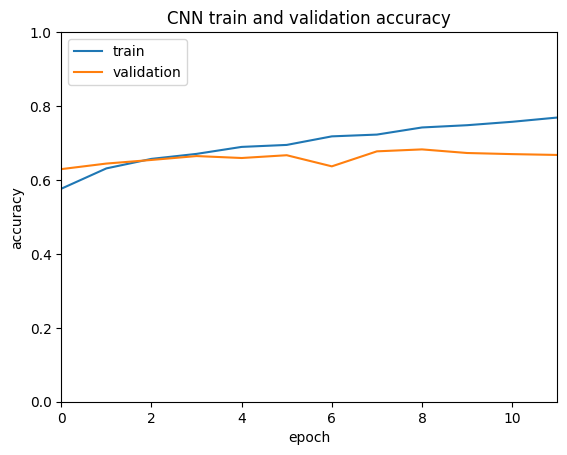

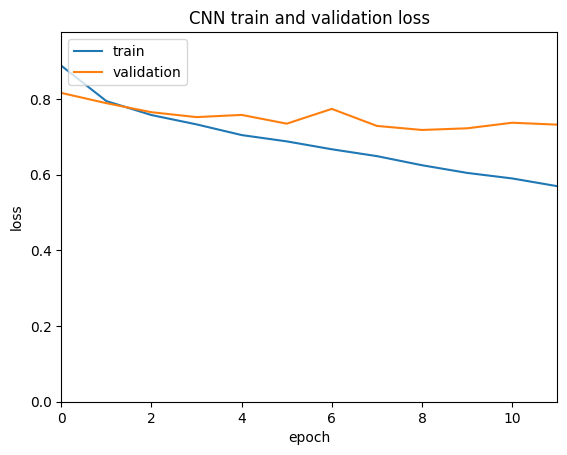

In [322]:
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])
plt.title('CNN train and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.ylim(0, 1)  # Set y-axis limits to the full range (0 to 1)
plt.xlim(0, len(history_cnn.history['accuracy']) - 1)  # Set x-axis limits to epochs
plt.show()


plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])
plt.title('CNN train and validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.ylim(0, max(max(history_cnn.history['loss']), max(history_cnn.history['val_loss'])) * 1.1)  # Adjust y-axis limits
plt.xlim(0, len(history_cnn.history['loss']) - 1)  # Set x-axis limits to epochs
plt.show()



dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


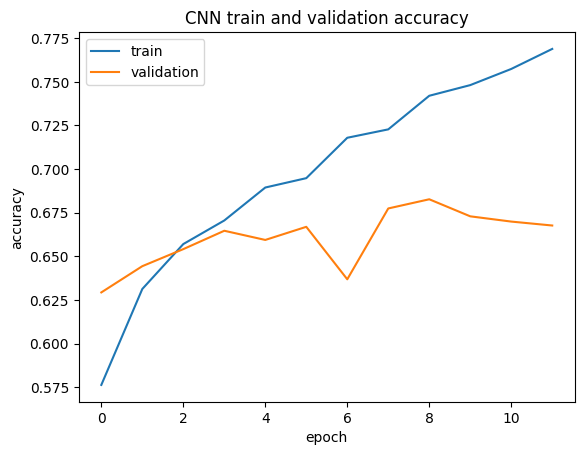

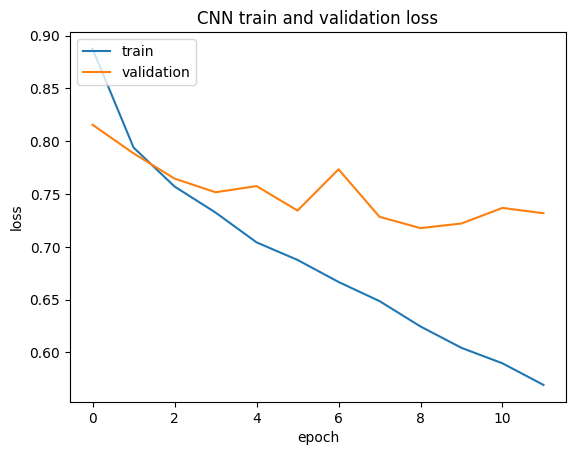

In [323]:
print(history_cnn.history.keys())
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])
plt.title('CNN train and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])
plt.title('CNN train and validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

In [324]:
# integer_label = 3
# original_label = label_encoder.inverse_transform([integer_label])
# print(original_label[0])

In [325]:
import numpy as np
from sklearn.metrics import classification_report



# Assuming you already have a trained LSTM model and test data
y_pred = model.predict(X_test_pad)
y_pred = np.argmax(y_pred, axis=1)


y_true = np.argmax(y_test, axis=1)

class_names = ['Non-Violence', 'Passive Violence', 'Direct Violence']

# Generate classification report with original class names
report = classification_report(y_true, y_pred, target_names=class_names, digits=4)

# Print the report
print(report)



63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
                  precision    recall  f1-score   support

    Non-Violence     0.7071    0.7600    0.7326      1096
Passive Violence     0.6190    0.5535    0.5844       719
 Direct Violence     0.5487    0.5323    0.5404       201

        accuracy                         0.6637      2016
       macro avg     0.6249    0.6153    0.6192      2016
    weighted avg     0.6599    0.6637    0.6606      2016



63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


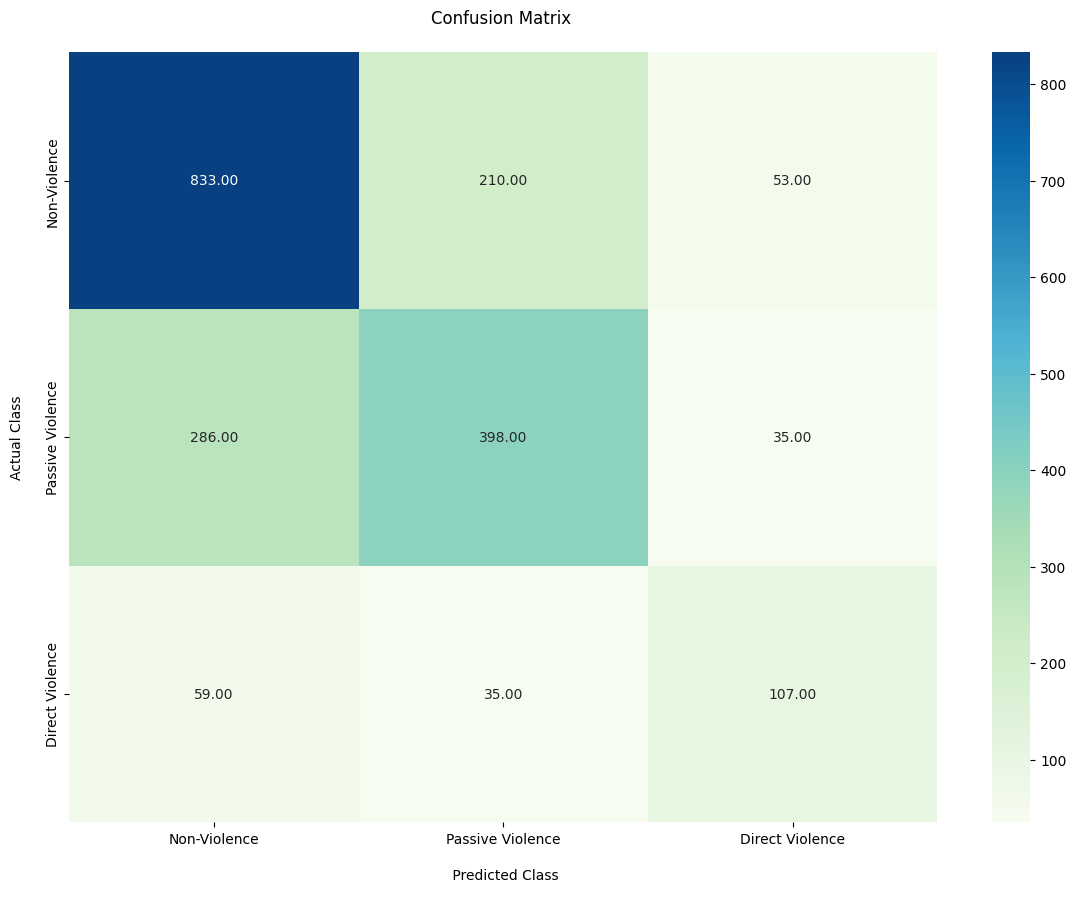

In [326]:
from sklearn.metrics import confusion_matrix
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


# Get predicted labels from your deep learning model
y_pred = model.predict(X_test_pad)
# print(y_pred)
# y_pred = np.round(y_pred)
y_pred = np.argmax(y_pred, axis=1)
# print(y_pred)
# Get true labels for the test set
y_true = y_test
y_true = np.argmax(y_true, axis=1)
# print(y_true)

# Generate a confusion matrix
cm = confusion_matrix(y_true, y_pred)


# Generate heatmap of confusion matrix

plt.figure(figsize=(14,10))
fx = sns.heatmap(cm, annot=True, fmt=".2f",cmap="GnBu")

# fx=sns.heatmap(confusion_matrix(y_test,mnb_pred), annot=True, fmt=".2f",cmap="GnBu")

fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Class\n')
fx.set_ylabel('Actual Class\n');
fx.xaxis.set_ticklabels(['Non-Violence', 'Passive Violence', 'Direct Violence'])
fx.yaxis.set_ticklabels(['Non-Violence', 'Passive Violence', 'Direct Violence'])
plt.show()

# Show the plot
plt.show()

# **ROC CURVE**

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


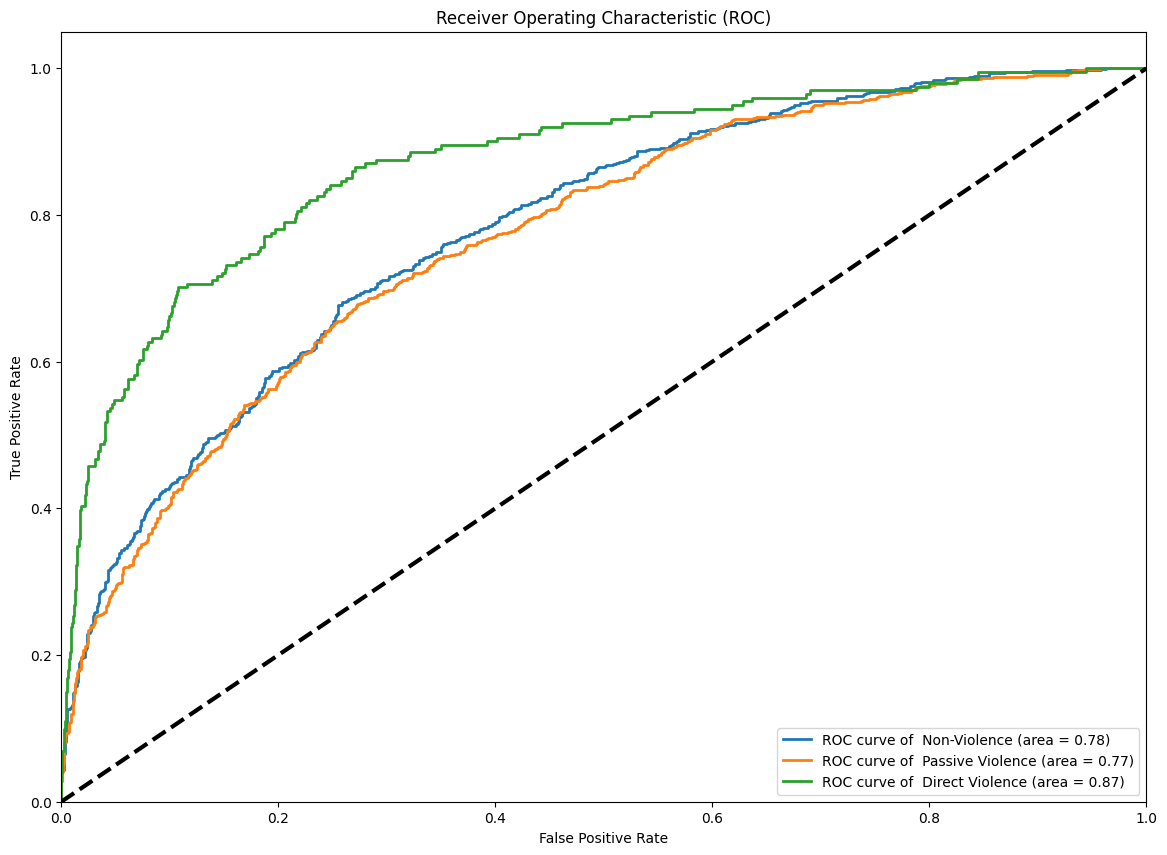

In [327]:
from sklearn.preprocessing import label_binarize

# Predict probabilities (make sure this returns probabilities, not class labels)
y_pred_proba = model.predict(X_test_pad)




# Convert true labels to binary format
y_true_bin = label_binarize(y_true, classes=[0, 1, 2])

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Class names
class_names = ['Non-Violence', 'Passive Violence', 'Direct Violence']

# Compute ROC curve and ROC AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(len(class_names)):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(14, 10))
for i in range(len(class_names)):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve of  {class_names[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=3)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


In [328]:
import time
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report

Model_name = 'CNN'

results = []

results.append({'Metric': 'Accuracy', Model_name: acc})

report = classification_report(y_true, y_pred, target_names=class_names, digits=4, output_dict=True)

# Add macro avg metrics (precision, recall, f1-score)
results.append({'Metric': 'Precision', Model_name: report['macro avg']['precision']})
results.append({'Metric': 'Recall', Model_name: report['macro avg']['recall']})
results.append({'Metric': 'F1 score', Model_name: report['macro avg']['f1-score']})

results.append({'Metric': 'Loss', Model_name: score})
results.append({'Metric': 'Training Time (s)', Model_name: Training_elapsed_time})
results.append({'Metric': 'Test Time (s)', Model_name: Test_elapsed_time})



CNN_df = pd.DataFrame(results)

# Transpose the DataFrame to make the metrics rows and values columns
CNN_df = CNN_df.set_index('Metric').T

CNN_df



Metric,Accuracy,Precision,Recall,F1 score,Loss,Training Time (s),Test Time (s)
CNN,0.66369,0.624941,0.615307,0.619156,0.725726,11.455287,0.59065


> LSTM

In [329]:
embedding_dim = EMBEDDING_DIM

In [330]:
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import Constant
from tensorflow.keras.optimizers import Adam

def build_lstm_model():
    # Input layer
    input_layer = Input(shape=(max_length,), dtype='int32')

    # Embedding layer (pre-trained)
    embedding_layer = Embedding(input_dim=num_words,
                                output_dim=embedding_dim,
                                embeddings_initializer=Constant(embedding_matrix),
                                input_length=max_length,
                                trainable=False)(input_layer)

    # LSTM layer
    lstm = LSTM(128, return_sequences=False)(embedding_layer)

    # Fully connected layer
    dense = Dense(128, activation='relu')(lstm)
    dropout = Dropout(0.5)(dense)

    # Output layer with softmax activation
    output_layer = Dense(num_classes, activation='softmax')(dropout)

    # Define and compile model
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model


In [331]:
import time
from sklearn.model_selection import cross_validate

start_time = time.time()


L_model = build_lstm_model()
history_L= L_model.fit(X_train_pad,y_train,batch_size=32,epochs=30,validation_data=(X_val_pad,y_val),verbose=2, callbacks=[EarlyStopping(patience=3)])

end_time = time.time()
Training_elapsed_time = end_time - start_time
print(f"Elapsed time: {Training_elapsed_time} seconds")

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


169/169 - 3s - 16ms/step - accuracy: 0.5119 - loss: 1.0278 - val_accuracy: 0.5383 - val_loss: 0.9713
Epoch 2/30
169/169 - 1s - 7ms/step - accuracy: 0.5152 - loss: 0.9656 - val_accuracy: 0.5429 - val_loss: 0.9233
Epoch 3/30
169/169 - 1s - 7ms/step - accuracy: 0.5265 - loss: 0.9339 - val_accuracy: 0.5511 - val_loss: 0.9132
Epoch 4/30
169/169 - 1s - 7ms/step - accuracy: 0.5326 - loss: 0.9230 - val_accuracy: 0.5534 - val_loss: 0.9031
Epoch 5/30
169/169 - 1s - 7ms/step - accuracy: 0.5389 - loss: 0.9167 - val_accuracy: 0.5586 - val_loss: 0.9041
Epoch 6/30
169/169 - 1s - 7ms/step - accuracy: 0.5380 - loss: 0.9136 - val_accuracy: 0.5609 - val_loss: 0.9178
Epoch 7/30
169/169 - 1s - 7ms/step - accuracy: 0.5372 - loss: 0.9066 - val_accuracy: 0.5534 - val_loss: 0.8994
Epoch 8/30
169/169 - 1s - 7ms/step - accuracy: 0.5394 - loss: 0.9088 - val_accuracy: 0.5549 - val_loss: 0.8764
Epoch 9/30
169/169 - 1s - 7ms/step - accuracy: 0.5422 - loss: 0.8928 - val_accuracy: 0.5579 - val_loss: 0.8847
Epoch 10/30

In [332]:
start_time = time.time()

score,acc=L_model.evaluate(X_test_pad,y_test,batch_size=128)

end_time = time.time()
Test_elapsed_time = end_time - start_time
print(f"Elapsed time: {Test_elapsed_time} seconds")

print('Test Score:',score)
print('Accuracy:',acc)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5903 - loss: 0.8014
Elapsed time: 0.1272292137145996 seconds
Test Score: 0.7649887800216675
Accuracy: 0.6121031641960144


In [333]:
import numpy as np
from sklearn.metrics import classification_report



# Assuming you already have a trained LSTM model and test data
y_pred = L_model.predict(X_test_pad)
y_pred = np.argmax(y_pred, axis=1)


y_true = np.argmax(y_test, axis=1)

class_names = ['Non-Violence', 'Passive Violence', 'Direct Violence']

# Generate classification report with original class names
report = classification_report(y_true, y_pred, target_names=class_names, digits=4)

# Print the report
print(report)



63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
                  precision    recall  f1-score   support

    Non-Violence     0.6861    0.6779    0.6820      1096
Passive Violence     0.5353    0.5271    0.5312       719
 Direct Violence     0.4978    0.5572    0.5258       201

        accuracy                         0.6121      2016
       macro avg     0.5730    0.5874    0.5797      2016
    weighted avg     0.6135    0.6121    0.6126      2016



In [334]:
import time
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report

Model_name = 'LSTM'

results = []

results.append({'Metric': 'Accuracy', Model_name: acc})

report = classification_report(y_true, y_pred, target_names=class_names, digits=4, output_dict=True)

# Add macro avg metrics (precision, recall, f1-score)
results.append({'Metric': 'Precision', Model_name: report['macro avg']['precision']})
results.append({'Metric': 'Recall', Model_name: report['macro avg']['recall']})
results.append({'Metric': 'F1 score', Model_name: report['macro avg']['f1-score']})

results.append({'Metric': 'Loss', Model_name: score})
results.append({'Metric': 'Training Time (s)', Model_name: Training_elapsed_time})
results.append({'Metric': 'Test Time (s)', Model_name: Test_elapsed_time})



LSTM_df = pd.DataFrame(results)

# Transpose the DataFrame to make the metrics rows and values columns
LSTM_df = LSTM_df.set_index('Metric').T

LSTM_df



Metric,Accuracy,Precision,Recall,F1 score,Loss,Training Time (s),Test Time (s)
LSTM,0.612103,0.573049,0.587418,0.579657,0.764989,29.552274,0.127229


**BiLSTM**>

In [335]:
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Bidirectional, Embedding, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import Constant
from tensorflow.keras.optimizers import Adam



def build_bilstm_model():
    # Input layer
    input_layer = Input(shape=(max_length,), dtype='int32')

    # Embedding layer (pre-trained)
    embedding_layer = Embedding(input_dim=num_words,
                                output_dim=embedding_dim,
                                embeddings_initializer=Constant(embedding_matrix),
                                input_length=max_length,
                                trainable=False)(input_layer)

    # Bidirectional LSTM layer
    bilstm = Bidirectional(LSTM(128, return_sequences=False))(embedding_layer)

    # Fully connected layer
    dense = Dense(128, activation='relu')(bilstm)
    dropout = Dropout(0.5)(dense)

    # Output layer with softmax activation
    output_layer = Dense(num_classes, activation='softmax')(dropout)

    # Define and compile model
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model


In [336]:
import time
from sklearn.model_selection import cross_validate

start_time = time.time()


L_model = build_bilstm_model()
history_L= L_model.fit(X_train_pad,y_train,batch_size=32,epochs=30,validation_data=(X_val_pad,y_val),verbose=2, callbacks=[EarlyStopping(patience=3)])

end_time = time.time()
Training_elapsed_time = end_time - start_time
print(f"Elapsed time: {Training_elapsed_time} seconds")


print('\n')

print('-----------Test Dataset Result-----------------------')


start_time = time.time()

score,acc=L_model.evaluate(X_test_pad,y_test,batch_size=128)

end_time = time.time()
Test_elapsed_time = end_time - start_time
print(f"Elapsed time: {Test_elapsed_time} seconds")

print('Test Score:',score)
print('Accuracy:',acc)

print('\n')

print('-----------Classification Report-----------------------')

import numpy as np
from sklearn.metrics import classification_report



# Assuming you already have a trained LSTM model and test data
y_pred = L_model.predict(X_test_pad)
y_pred = np.argmax(y_pred, axis=1)


y_true = np.argmax(y_test, axis=1)

class_names = ['Non-Violence', 'Passive Violence', 'Direct Violence']

# Generate classification report with original class names
report = classification_report(y_true, y_pred, target_names=class_names, digits=4)

# Print the report
print(report)


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


169/169 - 4s - 24ms/step - accuracy: 0.5117 - loss: 0.9969 - val_accuracy: 0.5947 - val_loss: 0.9279
Epoch 2/30
169/169 - 2s - 10ms/step - accuracy: 0.5756 - loss: 0.9106 - val_accuracy: 0.6173 - val_loss: 0.8540
Epoch 3/30
169/169 - 2s - 10ms/step - accuracy: 0.5957 - loss: 0.8624 - val_accuracy: 0.6323 - val_loss: 0.8141
Epoch 4/30
169/169 - 2s - 10ms/step - accuracy: 0.6096 - loss: 0.8374 - val_accuracy: 0.6459 - val_loss: 0.8015
Epoch 5/30
169/169 - 2s - 11ms/step - accuracy: 0.6256 - loss: 0.8134 - val_accuracy: 0.6398 - val_loss: 0.7846
Epoch 6/30
169/169 - 2s - 10ms/step - accuracy: 0.6322 - loss: 0.8093 - val_accuracy: 0.6301 - val_loss: 0.8101
Epoch 7/30
169/169 - 2s - 10ms/step - accuracy: 0.6348 - loss: 0.7975 - val_accuracy: 0.6579 - val_loss: 0.7637
Epoch 8/30
169/169 - 2s - 11ms/step - accuracy: 0.6419 - loss: 0.7898 - val_accuracy: 0.6556 - val_loss: 0.7700
Epoch 9/30
169/169 - 2s - 10ms/step - accuracy: 0.6431 - loss: 0.7800 - val_accuracy: 0.6632 - val_loss: 0.7636
Epo

In [337]:
import time
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report

Model_name = 'BiLSTM'

results = []

results.append({'Metric': 'Accuracy', Model_name: acc})

report = classification_report(y_true, y_pred, target_names=class_names, digits=4, output_dict=True)

# Add macro avg metrics (precision, recall, f1-score)
results.append({'Metric': 'Precision', Model_name: report['macro avg']['precision']})
results.append({'Metric': 'Recall', Model_name: report['macro avg']['recall']})
results.append({'Metric': 'F1 score', Model_name: report['macro avg']['f1-score']})

results.append({'Metric': 'Loss', Model_name: score})
results.append({'Metric': 'Training Time (s)', Model_name: Training_elapsed_time})
results.append({'Metric': 'Test Time (s)', Model_name: Test_elapsed_time})



BiLSTM_df = pd.DataFrame(results)

# Transpose the DataFrame to make the metrics rows and values columns
BiLSTM_df = BiLSTM_df.set_index('Metric').T


BiLSTM_df




Metric,Accuracy,Precision,Recall,F1 score,Loss,Training Time (s),Test Time (s)
BiLSTM,0.65873,0.617975,0.616551,0.593174,0.773858,32.647388,0.166309


**BiGRU**

In [338]:
import tensorflow as tf
from tensorflow.keras.layers import Input, GRU, Bidirectional, Embedding, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import Constant
from tensorflow.keras.optimizers import Adam



def build_bigru_model():
    # Input layer
    input_layer = Input(shape=(max_length,), dtype='int32')

    # Embedding layer (pre-trained)
    embedding_layer = Embedding(input_dim=num_words,
                                output_dim=embedding_dim,
                                embeddings_initializer=Constant(embedding_matrix),
                                input_length=max_length,
                                trainable=False)(input_layer)

    # Bidirectional GRU layer
    bigru = Bidirectional(GRU(128, return_sequences=False))(embedding_layer)

    # Fully connected layer
    dense = Dense(128, activation='relu')(bigru)
    dropout = Dropout(0.5)(dense)

    # Output layer with softmax activation
    output_layer = Dense(num_classes, activation='softmax')(dropout)

    # Define and compile model
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model


In [339]:
import time
from sklearn.model_selection import cross_validate

start_time = time.time()


L_model = build_bigru_model()
history_L= L_model.fit(X_train_pad,y_train,batch_size=32,epochs=30,validation_data=(X_val_pad,y_val),verbose=2, callbacks=[EarlyStopping(patience=3)])

end_time = time.time()
Training_elapsed_time = end_time - start_time
print(f"Elapsed time: {Training_elapsed_time} seconds")


print('\n')

print('-----------Test Dataset Result-----------------------')


start_time = time.time()

score,acc=L_model.evaluate(X_test_pad,y_test,batch_size=128)

end_time = time.time()
Test_elapsed_time = end_time - start_time
print(f"Elapsed time: {Test_elapsed_time} seconds")

print('Test Score:',score)
print('Accuracy:',acc)

print('\n')

print('-----------Classification Report-----------------------')

import numpy as np
from sklearn.metrics import classification_report



# Assuming you already have a trained LSTM model and test data
y_pred = L_model.predict(X_test_pad)
y_pred = np.argmax(y_pred, axis=1)


y_true = np.argmax(y_test, axis=1)

class_names = ['Non-Violence', 'Passive Violence', 'Direct Violence']

# Generate classification report with original class names
report = classification_report(y_true, y_pred, target_names=class_names, digits=4)

# Print the report
print(report)


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


169/169 - 4s - 23ms/step - accuracy: 0.5169 - loss: 0.9917 - val_accuracy: 0.5586 - val_loss: 0.9370
Epoch 2/30
169/169 - 2s - 11ms/step - accuracy: 0.5544 - loss: 0.9417 - val_accuracy: 0.6098 - val_loss: 0.8886
Epoch 3/30
169/169 - 2s - 11ms/step - accuracy: 0.5839 - loss: 0.8907 - val_accuracy: 0.6128 - val_loss: 0.8461
Epoch 4/30
169/169 - 2s - 11ms/step - accuracy: 0.6044 - loss: 0.8526 - val_accuracy: 0.6368 - val_loss: 0.8290
Epoch 5/30
169/169 - 2s - 11ms/step - accuracy: 0.6130 - loss: 0.8333 - val_accuracy: 0.6436 - val_loss: 0.8085
Epoch 6/30
169/169 - 2s - 11ms/step - accuracy: 0.6222 - loss: 0.8266 - val_accuracy: 0.6383 - val_loss: 0.8112
Epoch 7/30
169/169 - 2s - 11ms/step - accuracy: 0.6304 - loss: 0.8142 - val_accuracy: 0.6549 - val_loss: 0.7897
Epoch 8/30
169/169 - 2s - 11ms/step - accuracy: 0.6302 - loss: 0.8112 - val_accuracy: 0.6436 - val_loss: 0.7908
Epoch 9/30
169/169 - 2s - 10ms/step - accuracy: 0.6328 - loss: 0.8079 - val_accuracy: 0.6511 - val_loss: 0.7801
Epo

In [340]:
import time
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report

Model_name = 'BiGRU'

results = []

results.append({'Metric': 'Accuracy', Model_name: acc})

report = classification_report(y_true, y_pred, target_names=class_names, digits=4, output_dict=True)

# Add macro avg metrics (precision, recall, f1-score)
results.append({'Metric': 'Precision', Model_name: report['macro avg']['precision']})
results.append({'Metric': 'Recall', Model_name: report['macro avg']['recall']})
results.append({'Metric': 'F1 score', Model_name: report['macro avg']['f1-score']})

results.append({'Metric': 'Loss', Model_name: score})
results.append({'Metric': 'Training Time (s)', Model_name: Training_elapsed_time})
results.append({'Metric': 'Test Time (s)', Model_name: Test_elapsed_time})



BiGRU_df = pd.DataFrame(results)

# Transpose the DataFrame to make the metrics rows and values columns
BiGRU_df = BiGRU_df.set_index('Metric').T

BiGRU_df



Metric,Accuracy,Precision,Recall,F1 score,Loss,Training Time (s),Test Time (s)
BiGRU,0.675099,0.640355,0.609466,0.613457,0.715587,43.674315,0.161798


In [341]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, LSTM, Embedding, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import Constant
from tensorflow.keras.optimizers import Adam



def build_cnn_lstm_model():
    # Input layer
    input_layer = Input(shape=(max_length,), dtype='int32')

    # Embedding layer (pre-trained)
    embedding_layer = Embedding(input_dim=num_words,
                                output_dim=embedding_dim,
                                embeddings_initializer=Constant(embedding_matrix),
                                input_length=max_length,
                                trainable=False)(input_layer)

    # Convolutional layer for feature extraction
    conv1d = Conv1D(filters=64, kernel_size=3, activation='relu')(embedding_layer)
    maxpool = MaxPooling1D(pool_size=2)(conv1d)

    # LSTM layer for sequence modeling
    lstm = LSTM(128, return_sequences=False)(maxpool)

    # Fully connected layer
    dense = Dense(128, activation='relu')(lstm)
    dropout = Dropout(0.5)(dense)

    # Output layer with softmax activation
    output_layer = Dense(num_classes, activation='softmax')(dropout)

    # Define and compile model
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model


In [342]:
import time
from sklearn.model_selection import cross_validate

start_time = time.time()


L_model = build_cnn_lstm_model()
history_L= L_model.fit(X_train_pad,y_train,batch_size=32,epochs=30,validation_data=(X_val_pad,y_val),verbose=2, callbacks=[EarlyStopping(patience=3)])

end_time = time.time()
Training_elapsed_time = end_time - start_time
print(f"Elapsed time: {Training_elapsed_time} seconds")


print('\n')

print('-----------Test Dataset Result-----------------------')


start_time = time.time()

score,acc=L_model.evaluate(X_test_pad,y_test,batch_size=128)

end_time = time.time()
Test_elapsed_time = end_time - start_time
print(f"Elapsed time: {Test_elapsed_time} seconds")

print('Test Score:',score)
print('Accuracy:',acc)

print('\n')

print('-----------Classification Report-----------------------')

import numpy as np
from sklearn.metrics import classification_report



# Assuming you already have a trained LSTM model and test data
y_pred = L_model.predict(X_test_pad)
y_pred = np.argmax(y_pred, axis=1)


y_true = np.argmax(y_test, axis=1)

class_names = ['Non-Violence', 'Passive Violence', 'Direct Violence']

# Generate classification report with original class names
report = classification_report(y_true, y_pred, target_names=class_names, digits=4)

# Print the report
print(report)


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


169/169 - 3s - 18ms/step - accuracy: 0.5124 - loss: 1.0268 - val_accuracy: 0.5391 - val_loss: 0.9618
Epoch 2/30
169/169 - 1s - 6ms/step - accuracy: 0.5157 - loss: 0.9590 - val_accuracy: 0.5526 - val_loss: 0.9304
Epoch 3/30
169/169 - 1s - 6ms/step - accuracy: 0.5231 - loss: 0.9279 - val_accuracy: 0.5489 - val_loss: 0.9089
Epoch 4/30
169/169 - 1s - 6ms/step - accuracy: 0.5372 - loss: 0.9164 - val_accuracy: 0.5639 - val_loss: 0.9089
Epoch 5/30
169/169 - 1s - 6ms/step - accuracy: 0.5463 - loss: 0.9005 - val_accuracy: 0.5571 - val_loss: 0.8850
Epoch 6/30
169/169 - 1s - 6ms/step - accuracy: 0.5456 - loss: 0.8851 - val_accuracy: 0.5684 - val_loss: 0.8842
Epoch 7/30
169/169 - 1s - 6ms/step - accuracy: 0.5541 - loss: 0.8708 - val_accuracy: 0.5602 - val_loss: 0.8796
Epoch 8/30
169/169 - 1s - 6ms/step - accuracy: 0.5531 - loss: 0.8575 - val_accuracy: 0.5835 - val_loss: 0.8642
Epoch 9/30
169/169 - 1s - 6ms/step - accuracy: 0.5704 - loss: 0.8467 - val_accuracy: 0.5835 - val_loss: 0.8466
Epoch 10/30

In [343]:
import time
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report

Model_name = 'CNN_LSTM'

results = []

results.append({'Metric': 'Accuracy', Model_name: acc})

report = classification_report(y_true, y_pred, target_names=class_names, digits=4, output_dict=True)

# Add macro avg metrics (precision, recall, f1-score)
results.append({'Metric': 'Precision', Model_name: report['macro avg']['precision']})
results.append({'Metric': 'Recall', Model_name: report['macro avg']['recall']})
results.append({'Metric': 'F1 score', Model_name: report['macro avg']['f1-score']})

results.append({'Metric': 'Loss', Model_name: score})
results.append({'Metric': 'Training Time (s)', Model_name: Training_elapsed_time})
results.append({'Metric': 'Test Time (s)', Model_name: Test_elapsed_time})



CNN_LSTM_df = pd.DataFrame(results)

# Transpose the DataFrame to make the metrics rows and values columns
CNN_LSTM_df = CNN_LSTM_df.set_index('Metric').T

CNN_LSTM_df



Metric,Accuracy,Precision,Recall,F1 score,Loss,Training Time (s),Test Time (s)
CNN_LSTM,0.669147,0.631656,0.630129,0.630887,0.724411,32.960958,0.132468


In [344]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Bidirectional, LSTM, Embedding, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import Constant
from tensorflow.keras.optimizers import Adam



def build_cnn_bilstm_model():
    # Input layer
    input_layer = Input(shape=(max_length,), dtype='int32')

    # Embedding layer (pre-trained)
    embedding_layer = Embedding(input_dim=num_words,
                                output_dim=embedding_dim,
                                embeddings_initializer=Constant(embedding_matrix),
                                input_length=max_length,
                                trainable=False)(input_layer)

    # Convolutional layer for feature extraction
    conv1d = Conv1D(filters=64, kernel_size=3, activation='relu')(embedding_layer)
    maxpool = MaxPooling1D(pool_size=2)(conv1d)

    # Bidirectional LSTM layer for sequence modeling
    bilstm = Bidirectional(LSTM(128, return_sequences=False))(maxpool)

    # Fully connected layer
    dense = Dense(128, activation='relu')(bilstm)
    dropout = Dropout(0.5)(dense)

    # Output layer with softmax activation
    output_layer = Dense(num_classes, activation='softmax')(dropout)

    # Define and compile model
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model


In [345]:
import time
from sklearn.model_selection import cross_validate

start_time = time.time()


L_model = build_cnn_bilstm_model()
history_L= L_model.fit(X_train_pad,y_train,batch_size=32,epochs=30,validation_data=(X_val_pad,y_val),verbose=2, callbacks=[EarlyStopping(patience=3)])

end_time = time.time()
Training_elapsed_time = end_time - start_time
print(f"Elapsed time: {Training_elapsed_time} seconds")


print('\n')

print('-----------Test Dataset Result-----------------------')


start_time = time.time()

score,acc=L_model.evaluate(X_test_pad,y_test,batch_size=128)

end_time = time.time()
Test_elapsed_time = end_time - start_time
print(f"Elapsed time: {Test_elapsed_time} seconds")

print('Test Score:',score)
print('Accuracy:',acc)

print('\n')

print('-----------Classification Report-----------------------')

import numpy as np
from sklearn.metrics import classification_report



# Assuming you already have a trained LSTM model and test data
y_pred = L_model.predict(X_test_pad)
y_pred = np.argmax(y_pred, axis=1)


y_true = np.argmax(y_test, axis=1)

class_names = ['Non-Violence', 'Passive Violence', 'Direct Violence']

# Generate classification report with original class names
report = classification_report(y_true, y_pred, target_names=class_names, digits=4)

# Print the report
print(report)


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


169/169 - 4s - 23ms/step - accuracy: 0.5020 - loss: 1.0128 - val_accuracy: 0.5481 - val_loss: 0.9691
Epoch 2/30
169/169 - 1s - 8ms/step - accuracy: 0.5456 - loss: 0.9428 - val_accuracy: 0.5977 - val_loss: 0.8704
Epoch 3/30
169/169 - 1s - 9ms/step - accuracy: 0.5943 - loss: 0.8681 - val_accuracy: 0.6203 - val_loss: 0.8149
Epoch 4/30
169/169 - 1s - 9ms/step - accuracy: 0.6013 - loss: 0.8299 - val_accuracy: 0.6398 - val_loss: 0.7965
Epoch 5/30
169/169 - 1s - 8ms/step - accuracy: 0.6226 - loss: 0.8076 - val_accuracy: 0.6316 - val_loss: 0.7905
Epoch 6/30
169/169 - 1s - 8ms/step - accuracy: 0.6331 - loss: 0.7964 - val_accuracy: 0.6549 - val_loss: 0.7864
Epoch 7/30
169/169 - 1s - 8ms/step - accuracy: 0.6378 - loss: 0.7852 - val_accuracy: 0.6534 - val_loss: 0.7711
Epoch 8/30
169/169 - 1s - 8ms/step - accuracy: 0.6402 - loss: 0.7739 - val_accuracy: 0.6586 - val_loss: 0.7589
Epoch 9/30
169/169 - 1s - 8ms/step - accuracy: 0.6530 - loss: 0.7679 - val_accuracy: 0.6564 - val_loss: 0.7645
Epoch 10/30

In [346]:
import time
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report

Model_name = 'CNN_BiLSTM'

results = []

results.append({'Metric': 'Accuracy', Model_name: acc})

report = classification_report(y_true, y_pred, target_names=class_names, digits=4, output_dict=True)

# Add macro avg metrics (precision, recall, f1-score)
results.append({'Metric': 'Precision', Model_name: report['macro avg']['precision']})
results.append({'Metric': 'Recall', Model_name: report['macro avg']['recall']})
results.append({'Metric': 'F1 score', Model_name: report['macro avg']['f1-score']})

results.append({'Metric': 'Loss', Model_name: score})
results.append({'Metric': 'Training Time (s)', Model_name: Training_elapsed_time})
results.append({'Metric': 'Test Time (s)', Model_name: Test_elapsed_time})



CNN_BiLSTM_df = pd.DataFrame(results)

# Transpose the DataFrame to make the metrics rows and values columns
CNN_BiLSTM_df = CNN_BiLSTM_df.set_index('Metric').T


CNN_BiLSTM_df





Metric,Accuracy,Precision,Recall,F1 score,Loss,Training Time (s),Test Time (s)
CNN_BiLSTM,0.681548,0.642673,0.610395,0.616228,0.714357,26.626913,0.125877


In [347]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Bidirectional, GRU, Embedding, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import Constant
from tensorflow.keras.optimizers import Adam



def build_cnn_bigru_model():
    # Input layer
    input_layer = Input(shape=(max_length,), dtype='int32')

    # Embedding layer (pre-trained)
    embedding_layer = Embedding(input_dim=num_words,
                                output_dim=embedding_dim,
                                embeddings_initializer=Constant(embedding_matrix),
                                input_length=max_length,
                                trainable=False)(input_layer)

    # Convolutional layer for feature extraction
    conv1d = Conv1D(filters=64, kernel_size=3, activation='relu')(embedding_layer)
    maxpool = MaxPooling1D(pool_size=2)(conv1d)

    # Bidirectional GRU layer for sequence modeling
    bigru = Bidirectional(GRU(128, return_sequences=False))(maxpool)

    # Fully connected layer
    dense = Dense(128, activation='relu')(bigru)
    dropout = Dropout(0.5)(dense)

    # Output layer with softmax activation
    output_layer = Dense(num_classes, activation='softmax')(dropout)

    # Define and compile model
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model


In [348]:
import time
from sklearn.model_selection import cross_validate

start_time = time.time()


L_model = build_cnn_bigru_model()
history_L= L_model.fit(X_train_pad,y_train,batch_size=32,epochs=30,validation_data=(X_val_pad,y_val),verbose=2, callbacks=[EarlyStopping(patience=3)])

end_time = time.time()
Training_elapsed_time = end_time - start_time
print(f"Elapsed time: {Training_elapsed_time} seconds")


print('\n')

print('-----------Test Dataset Result-----------------------')


start_time = time.time()

score,acc=L_model.evaluate(X_test_pad,y_test,batch_size=128)

end_time = time.time()
Test_elapsed_time = end_time - start_time
print(f"Elapsed time: {Test_elapsed_time} seconds")

print('Test Score:',score)
print('Accuracy:',acc)

print('\n')

print('-----------Classification Report-----------------------')

import numpy as np
from sklearn.metrics import classification_report



# Assuming you already have a trained LSTM model and test data
y_pred = L_model.predict(X_test_pad)
y_pred = np.argmax(y_pred, axis=1)


y_true = np.argmax(y_test, axis=1)

class_names = ['Non-Violence', 'Passive Violence', 'Direct Violence']

# Generate classification report with original class names
report = classification_report(y_true, y_pred, target_names=class_names, digits=4)

# Print the report
print(report)


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


169/169 - 4s - 22ms/step - accuracy: 0.5022 - loss: 0.9942 - val_accuracy: 0.5391 - val_loss: 0.9399
Epoch 2/30
169/169 - 2s - 9ms/step - accuracy: 0.5628 - loss: 0.9093 - val_accuracy: 0.6226 - val_loss: 0.8661
Epoch 3/30
169/169 - 1s - 8ms/step - accuracy: 0.6017 - loss: 0.8599 - val_accuracy: 0.6353 - val_loss: 0.8259
Epoch 4/30
169/169 - 1s - 8ms/step - accuracy: 0.6230 - loss: 0.8276 - val_accuracy: 0.6534 - val_loss: 0.8056
Epoch 5/30
169/169 - 1s - 8ms/step - accuracy: 0.6289 - loss: 0.8140 - val_accuracy: 0.6338 - val_loss: 0.8100
Epoch 6/30
169/169 - 1s - 8ms/step - accuracy: 0.6319 - loss: 0.8029 - val_accuracy: 0.6383 - val_loss: 0.7968
Epoch 7/30
169/169 - 1s - 8ms/step - accuracy: 0.6450 - loss: 0.7866 - val_accuracy: 0.6444 - val_loss: 0.7844
Epoch 8/30
169/169 - 1s - 8ms/step - accuracy: 0.6487 - loss: 0.7798 - val_accuracy: 0.6519 - val_loss: 0.7695
Epoch 9/30
169/169 - 1s - 8ms/step - accuracy: 0.6506 - loss: 0.7687 - val_accuracy: 0.6496 - val_loss: 0.7780
Epoch 10/30

In [349]:
import time
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report

Model_name = 'CNN_BiGRU'

results = []

results.append({'Metric': 'Accuracy', Model_name: acc})

report = classification_report(y_true, y_pred, target_names=class_names, digits=4, output_dict=True)

# Add macro avg metrics (precision, recall, f1-score)
results.append({'Metric': 'Precision', Model_name: report['macro avg']['precision']})
results.append({'Metric': 'Recall', Model_name: report['macro avg']['recall']})
results.append({'Metric': 'F1 score', Model_name: report['macro avg']['f1-score']})

results.append({'Metric': 'Loss', Model_name: score})
results.append({'Metric': 'Training Time (s)', Model_name: Training_elapsed_time})
results.append({'Metric': 'Test Time (s)', Model_name: Test_elapsed_time})



CNN_BiGRU_df = pd.DataFrame(results)

# Transpose the DataFrame to make the metrics rows and values columns
CNN_BiGRU_df = CNN_BiGRU_df.set_index('Metric').T

CNN_BiGRU_df


Metric,Accuracy,Precision,Recall,F1 score,Loss,Training Time (s),Test Time (s)
CNN_BiGRU,0.657738,0.596247,0.635393,0.603997,0.747721,28.450983,0.12609


In [350]:
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Conv1D, MaxPooling1D, Embedding, Dense, Dropout, GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import Constant
from tensorflow.keras.optimizers import Adam


def build_lstm_cnn_model():
    # Input layer
    input_layer = Input(shape=(max_length,), dtype='int32')

    # Embedding layer (pre-trained)
    embedding_layer = Embedding(input_dim=num_words,
                                output_dim=embedding_dim,
                                embeddings_initializer=Constant(embedding_matrix),
                                input_length=max_length,
                                trainable=False)(input_layer)

    # LSTM layer for sequence modeling (returning only the final state)
    lstm = LSTM(128, return_sequences=False)(embedding_layer)

    # Convolutional layer for feature extraction
    conv1d = Conv1D(filters=64, kernel_size=3, activation='relu')(embedding_layer)
    maxpool = MaxPooling1D(pool_size=2)(conv1d)

    # Use GlobalMaxPooling1D to reduce the sequence to a fixed size
    cnn_out = GlobalMaxPooling1D()(maxpool)

    # Combine the LSTM and CNN outputs
    combined = tf.keras.layers.concatenate([lstm, cnn_out], axis=-1)

    # Fully connected layer
    dense = Dense(128, activation='relu')(combined)
    dropout = Dropout(0.5)(dense)

    # Output layer with softmax activation
    output_layer = Dense(num_classes, activation='softmax')(dropout)

    # Define and compile model
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model


In [351]:
import time
from sklearn.model_selection import cross_validate

start_time = time.time()


L_model = build_lstm_cnn_model()
history_L= L_model.fit(X_train_pad,y_train,batch_size=32,epochs=30,validation_data=(X_val_pad,y_val),verbose=2, callbacks=[EarlyStopping(patience=3)])

end_time = time.time()
Training_elapsed_time = end_time - start_time
print(f"Elapsed time: {Training_elapsed_time} seconds")


print('\n')

print('-----------Test Dataset Result-----------------------')


start_time = time.time()

score,acc=L_model.evaluate(X_test_pad,y_test,batch_size=128)

end_time = time.time()
Test_elapsed_time = end_time - start_time
print(f"Elapsed time: {Test_elapsed_time} seconds")

print('Test Score:',score)
print('Accuracy:',acc)

print('\n')

print('-----------Classification Report-----------------------')

import numpy as np
from sklearn.metrics import classification_report



# Assuming you already have a trained LSTM model and test data
y_pred = L_model.predict(X_test_pad)
y_pred = np.argmax(y_pred, axis=1)


y_true = np.argmax(y_test, axis=1)

class_names = ['Non-Violence', 'Passive Violence', 'Direct Violence']

# Generate classification report with original class names
report = classification_report(y_true, y_pred, target_names=class_names, digits=4)

# Print the report
print(report)


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


169/169 - 3s - 18ms/step - accuracy: 0.4589 - loss: 1.0299 - val_accuracy: 0.5414 - val_loss: 0.9525
Epoch 2/30
169/169 - 1s - 7ms/step - accuracy: 0.5404 - loss: 0.9402 - val_accuracy: 0.6090 - val_loss: 0.8713
Epoch 3/30
169/169 - 1s - 7ms/step - accuracy: 0.5787 - loss: 0.8871 - val_accuracy: 0.6301 - val_loss: 0.8340
Epoch 4/30
169/169 - 1s - 8ms/step - accuracy: 0.6057 - loss: 0.8491 - val_accuracy: 0.6564 - val_loss: 0.8054
Epoch 5/30
169/169 - 1s - 8ms/step - accuracy: 0.6178 - loss: 0.8308 - val_accuracy: 0.6504 - val_loss: 0.7960
Epoch 6/30
169/169 - 1s - 7ms/step - accuracy: 0.6278 - loss: 0.8127 - val_accuracy: 0.6519 - val_loss: 0.7948
Epoch 7/30
169/169 - 1s - 8ms/step - accuracy: 0.6402 - loss: 0.7990 - val_accuracy: 0.6609 - val_loss: 0.7637
Epoch 8/30
169/169 - 1s - 8ms/step - accuracy: 0.6433 - loss: 0.7857 - val_accuracy: 0.6647 - val_loss: 0.7560
Epoch 9/30
169/169 - 1s - 7ms/step - accuracy: 0.6476 - loss: 0.7682 - val_accuracy: 0.6647 - val_loss: 0.7593
Epoch 10/30

In [352]:
import time
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report

Model_name = 'LSTM_CNN'

results = []

results.append({'Metric': 'Accuracy', Model_name: acc})

report = classification_report(y_true, y_pred, target_names=class_names, digits=4, output_dict=True)

# Add macro avg metrics (precision, recall, f1-score)
results.append({'Metric': 'Precision', Model_name: report['macro avg']['precision']})
results.append({'Metric': 'Recall', Model_name: report['macro avg']['recall']})
results.append({'Metric': 'F1 score', Model_name: report['macro avg']['f1-score']})

results.append({'Metric': 'Loss', Model_name: score})
results.append({'Metric': 'Training Time (s)', Model_name: Training_elapsed_time})
results.append({'Metric': 'Test Time (s)', Model_name: Test_elapsed_time})



LSTM_CNN_df = pd.DataFrame(results)

# Transpose the DataFrame to make the metrics rows and values columns
LSTM_CNN_df = LSTM_CNN_df.set_index('Metric').T


LSTM_CNN_df


Metric,Accuracy,Precision,Recall,F1 score,Loss,Training Time (s),Test Time (s)
LSTM_CNN,0.649306,0.589497,0.628563,0.603524,0.768416,28.998549,0.128275


In [353]:
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Conv1D, MaxPooling1D, Embedding, Dense, Dropout, Bidirectional, GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import Constant
from tensorflow.keras.optimizers import Adam



def build_bilstm_cnn_model():
    # Input layer
    input_layer = Input(shape=(max_length,), dtype='int32')

    # Embedding layer (pre-trained)
    embedding_layer = Embedding(input_dim=num_words,
                                output_dim=embedding_dim,
                                embeddings_initializer=Constant(embedding_matrix),
                                input_length=max_length,
                                trainable=False)(input_layer)

    # Bidirectional LSTM layer
    bilstm = Bidirectional(LSTM(128, return_sequences=False))(embedding_layer)

    # Convolutional layer for feature extraction
    conv1d = Conv1D(filters=64, kernel_size=3, activation='relu')(embedding_layer)
    maxpool = MaxPooling1D(pool_size=2)(conv1d)

    # Use GlobalMaxPooling1D to reduce the CNN output to a fixed size
    cnn_out = GlobalMaxPooling1D()(maxpool)

    # Combine the BiLSTM and CNN outputs
    combined = tf.keras.layers.concatenate([bilstm, cnn_out], axis=-1)

    # Fully connected layer
    dense = Dense(128, activation='relu')(combined)
    dropout = Dropout(0.5)(dense)

    # Output layer with softmax activation
    output_layer = Dense(num_classes, activation='softmax')(dropout)

    # Define and compile model
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model


In [354]:
import time
from sklearn.model_selection import cross_validate

start_time = time.time()


L_model = build_bilstm_cnn_model()
history_L= L_model.fit(X_train_pad,y_train,batch_size=32,epochs=30,validation_data=(X_val_pad,y_val),verbose=2, callbacks=[EarlyStopping(patience=3)])

end_time = time.time()
Training_elapsed_time = end_time - start_time
print(f"Elapsed time: {Training_elapsed_time} seconds")


print('\n')

print('-----------Test Dataset Result-----------------------')


start_time = time.time()

score,acc=L_model.evaluate(X_test_pad,y_test,batch_size=128)

end_time = time.time()
Test_elapsed_time = end_time - start_time
print(f"Elapsed time: {Test_elapsed_time} seconds")

print('Test Score:',score)
print('Accuracy:',acc)

print('\n')

print('-----------Classification Report-----------------------')

import numpy as np
from sklearn.metrics import classification_report



# Assuming you already have a trained LSTM model and test data
y_pred = L_model.predict(X_test_pad)
y_pred = np.argmax(y_pred, axis=1)


y_true = np.argmax(y_test, axis=1)

class_names = ['Non-Violence', 'Passive Violence', 'Direct Violence']

# Generate classification report with original class names
report = classification_report(y_true, y_pred, target_names=class_names, digits=4)

# Print the report
print(report)


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


169/169 - 4s - 27ms/step - accuracy: 0.5252 - loss: 0.9743 - val_accuracy: 0.6120 - val_loss: 0.8975
Epoch 2/30
169/169 - 2s - 11ms/step - accuracy: 0.5885 - loss: 0.8824 - val_accuracy: 0.6203 - val_loss: 0.8354
Epoch 3/30
169/169 - 2s - 11ms/step - accuracy: 0.6020 - loss: 0.8389 - val_accuracy: 0.6233 - val_loss: 0.8207
Epoch 4/30
169/169 - 2s - 13ms/step - accuracy: 0.6193 - loss: 0.8180 - val_accuracy: 0.6602 - val_loss: 0.7793
Epoch 5/30
169/169 - 2s - 11ms/step - accuracy: 0.6328 - loss: 0.7999 - val_accuracy: 0.6504 - val_loss: 0.7663
Epoch 6/30
169/169 - 2s - 11ms/step - accuracy: 0.6385 - loss: 0.7843 - val_accuracy: 0.6624 - val_loss: 0.7610
Epoch 7/30
169/169 - 2s - 11ms/step - accuracy: 0.6489 - loss: 0.7717 - val_accuracy: 0.6556 - val_loss: 0.7508
Epoch 8/30
169/169 - 2s - 11ms/step - accuracy: 0.6543 - loss: 0.7657 - val_accuracy: 0.6699 - val_loss: 0.7463
Epoch 9/30
169/169 - 2s - 11ms/step - accuracy: 0.6578 - loss: 0.7523 - val_accuracy: 0.6707 - val_loss: 0.7389
Epo

In [355]:
import time
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report

Model_name = 'BiLSTM_CNN'

results = []

results.append({'Metric': 'Accuracy', Model_name: acc})

report = classification_report(y_true, y_pred, target_names=class_names, digits=4, output_dict=True)

# Add macro avg metrics (precision, recall, f1-score)
results.append({'Metric': 'Precision', Model_name: report['macro avg']['precision']})
results.append({'Metric': 'Recall', Model_name: report['macro avg']['recall']})
results.append({'Metric': 'F1 score', Model_name: report['macro avg']['f1-score']})

results.append({'Metric': 'Loss', Model_name: score})
results.append({'Metric': 'Training Time (s)', Model_name: Training_elapsed_time})
results.append({'Metric': 'Test Time (s)', Model_name: Test_elapsed_time})



BiLSTM_CNN_df = pd.DataFrame(results)

# Transpose the DataFrame to make the metrics rows and values columns
BiLSTM_CNN_df = BiLSTM_CNN_df.set_index('Metric').T


BiLSTM_CNN_df


Metric,Accuracy,Precision,Recall,F1 score,Loss,Training Time (s),Test Time (s)
BiLSTM_CNN,0.685516,0.651042,0.623986,0.63239,0.701456,35.375356,0.175365


In [356]:
import tensorflow as tf
from tensorflow.keras.layers import Input, GRU, Conv1D, MaxPooling1D, Embedding, Dense, Dropout, Bidirectional, GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import Constant
from tensorflow.keras.optimizers import Adam


def build_bigru_cnn_model():
    # Input layer
    input_layer = Input(shape=(max_length,), dtype='int32')

    # Embedding layer (pre-trained)
    embedding_layer = Embedding(input_dim=num_words,
                                output_dim=embedding_dim,
                                embeddings_initializer=Constant(embedding_matrix),
                                input_length=max_length,
                                trainable=False)(input_layer)

    # Bidirectional GRU layer
    bigru = Bidirectional(GRU(128, return_sequences=False))(embedding_layer)

    # Convolutional layer for feature extraction
    conv1d = Conv1D(filters=64, kernel_size=3, activation='relu')(embedding_layer)
    maxpool = MaxPooling1D(pool_size=2)(conv1d)

    # Use GlobalMaxPooling1D to reduce the CNN output to a fixed size
    cnn_out = GlobalMaxPooling1D()(maxpool)

    # Combine the BiGRU and CNN outputs
    combined = tf.keras.layers.concatenate([bigru, cnn_out], axis=-1)

    # Fully connected layer
    dense = Dense(128, activation='relu')(combined)
    dropout = Dropout(0.5)(dense)

    # Output layer with softmax activation
    output_layer = Dense(num_classes, activation='softmax')(dropout)

    # Define and compile model
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model


In [357]:
import time
from sklearn.model_selection import cross_validate

start_time = time.time()


L_model = build_bigru_cnn_model()
history_L= L_model.fit(X_train_pad,y_train,batch_size=32,epochs=30,validation_data=(X_val_pad,y_val),verbose=2, callbacks=[EarlyStopping(patience=3)])

end_time = time.time()
Training_elapsed_time = end_time - start_time
print(f"Elapsed time: {Training_elapsed_time} seconds")


print('\n')

print('-----------Test Dataset Result-----------------------')


start_time = time.time()

score,acc=L_model.evaluate(X_test_pad,y_test,batch_size=128)

end_time = time.time()
Test_elapsed_time = end_time - start_time
print(f"Elapsed time: {Test_elapsed_time} seconds")

print('Test Score:',score)
print('Accuracy:',acc)

print('\n')

print('-----------Classification Report-----------------------')

import numpy as np
from sklearn.metrics import classification_report



# Assuming you already have a trained LSTM model and test data
y_pred = L_model.predict(X_test_pad)
y_pred = np.argmax(y_pred, axis=1)


y_true = np.argmax(y_test, axis=1)

class_names = ['Non-Violence', 'Passive Violence', 'Direct Violence']

# Generate classification report with original class names
report = classification_report(y_true, y_pred, target_names=class_names, digits=4)

# Print the report
print(report)


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


169/169 - 4s - 25ms/step - accuracy: 0.5237 - loss: 0.9763 - val_accuracy: 0.5970 - val_loss: 0.9013
Epoch 2/30
169/169 - 2s - 12ms/step - accuracy: 0.5746 - loss: 0.9089 - val_accuracy: 0.6331 - val_loss: 0.8554
Epoch 3/30
169/169 - 2s - 12ms/step - accuracy: 0.5969 - loss: 0.8601 - val_accuracy: 0.6421 - val_loss: 0.8066
Epoch 4/30
169/169 - 2s - 11ms/step - accuracy: 0.6215 - loss: 0.8210 - val_accuracy: 0.6556 - val_loss: 0.7859
Epoch 5/30
169/169 - 2s - 11ms/step - accuracy: 0.6293 - loss: 0.8066 - val_accuracy: 0.6466 - val_loss: 0.7837
Epoch 6/30
169/169 - 2s - 11ms/step - accuracy: 0.6365 - loss: 0.7918 - val_accuracy: 0.6549 - val_loss: 0.7667
Epoch 7/30
169/169 - 2s - 11ms/step - accuracy: 0.6465 - loss: 0.7845 - val_accuracy: 0.6632 - val_loss: 0.7601
Epoch 8/30
169/169 - 2s - 12ms/step - accuracy: 0.6467 - loss: 0.7739 - val_accuracy: 0.6617 - val_loss: 0.7541
Epoch 9/30
169/169 - 2s - 11ms/step - accuracy: 0.6478 - loss: 0.7651 - val_accuracy: 0.6586 - val_loss: 0.7597
Epo

In [358]:
import time
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report

Model_name = 'BiGRU_CNN'

results = []

results.append({'Metric': 'Accuracy', Model_name: acc})

report = classification_report(y_true, y_pred, target_names=class_names, digits=4, output_dict=True)

# Add macro avg metrics (precision, recall, f1-score)
results.append({'Metric': 'Precision', Model_name: report['macro avg']['precision']})
results.append({'Metric': 'Recall', Model_name: report['macro avg']['recall']})
results.append({'Metric': 'F1 score', Model_name: report['macro avg']['f1-score']})

results.append({'Metric': 'Loss', Model_name: score})
results.append({'Metric': 'Training Time (s)', Model_name: Training_elapsed_time})
results.append({'Metric': 'Test Time (s)', Model_name: Test_elapsed_time})



BiGRU_CNN_df = pd.DataFrame(results)

# Transpose the DataFrame to make the metrics rows and values columns
BiGRU_CNN_df = BiGRU_CNN_df.set_index('Metric').T


BiGRU_CNN_df


Metric,Accuracy,Precision,Recall,F1 score,Loss,Training Time (s),Test Time (s)
BiGRU_CNN,0.689484,0.664162,0.613436,0.6319,0.69609,43.368853,0.163839


In [359]:
import pandas as pd

# Concatenate all DataFrames vertically (row-wise)
final_df = pd.concat([
    CNN_df,
    LSTM_df,
    BiLSTM_df,
    BiGRU_df,
    CNN_LSTM_df,
    CNN_BiLSTM_df,
    CNN_BiGRU_df,
    LSTM_CNN_df,
    BiLSTM_CNN_df,
    BiGRU_CNN_df
], ignore_index=False)  # use ignore_index=True to reset row index

final_df


Metric,Accuracy,Precision,Recall,F1 score,Loss,Training Time (s),Test Time (s)
CNN,0.663690,0.624941,0.615307,0.619156,0.725726,11.455287,0.590650
LSTM,0.612103,0.573049,0.587418,0.579657,0.764989,29.552274,0.127229
BiLSTM,0.658730,0.617975,0.616551,0.593174,0.773858,32.647388,0.166309
BiGRU,0.675099,0.640355,0.609466,0.613457,0.715587,43.674315,0.161798
CNN_LSTM,0.669147,0.631656,0.630129,0.630887,0.724411,32.960958,0.132468
CNN_BiLSTM,0.681548,0.642673,0.610395,0.616228,0.714357,26.626913,0.125877
CNN_BiGRU,0.657738,0.596247,0.635393,0.603997,0.747721,28.450983,0.126090
LSTM_CNN,0.649306,0.589497,0.628563,0.603524,0.768416,28.998549,0.128275
BiLSTM_CNN,0.685516,0.651042,0.623986,0.632390,0.701456,35.375356,0.175365
BiGRU_CNN,0.689484,0.664162,0.613436,0.631900,0.696090,43.368853,0.163839
